In [1]:
from utils.dataset import IOSMapDataset

In [2]:
import torchvision.transforms as T

tfm = T.Compose([T.Resize((240, 320)), T.ToTensor()])

root = "/media/emmanuel/nvme_storage/datasets/crocodl_dataset/HYDRO/sessions"  # contains ios_map/ and ios_query/
subsession = "ios_2023-10-27_10.20.23_000"

In [3]:
ds = IOSMapDataset(root, tfm, subsession=subsession)
ds.samples.sort(key=lambda d: d.timestamp)

In [4]:
from torch.utils.data import Dataset

class SimpleIosMapWrapper(Dataset):
    def __init__(self, root, subsession, tfm=None):
        if tfm is None:
            tfm = T.Compose([T.Resize((480, 640)), T.ToTensor()])
        self.ds = IOSMapDataset(root, tfm, subsession=subsession)
        self.ds.samples.sort(key=lambda d: d.timestamp)

    def __len__(self) -> int:
        return len(self.ds)

    def __getitem__(self, idx) -> dict:
        timestamp = self.ds[idx]['timestamp']
        for k, v in self.ds[idx]['img_sensor'].items():
            return {
                'img': v.img,
                'Twc': v.Tws,
                'K': v.K,
                'timestamp': timestamp
            }

In [5]:
ds = SimpleIosMapWrapper(root, subsession, tfm)

In [6]:
import random
import torch

def sequence(n: int = 2):
    frames = [ds[i]['img'].unsqueeze(0) for i in range(n)]
    random.shuffle(frames)
    sequence = torch.cat(frames, dim=0)

    return sequence

In [21]:
x = sequence(100).unsqueeze(0)

In [22]:
from transformers.transformers import PoseTransformer

In [23]:
model = PoseTransformer(
    input_size = (240, 320), 
    patch_size = 16
)
model = model.to('cuda')

In [24]:
model(x.to('cuda'))['t'].shape

torch.Size([1, 100, 3])

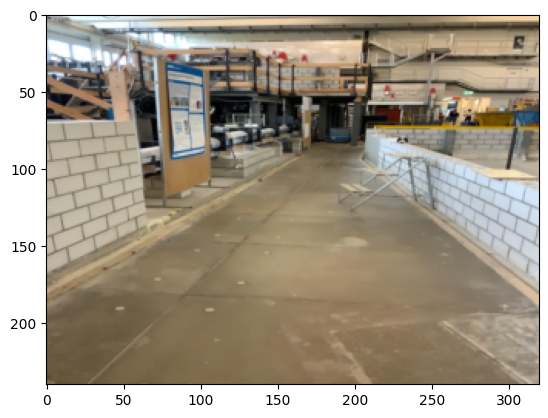

In [11]:
import matplotlib.pyplot as plt

img = ds[0]['img'].permute(1,2,0).numpy()
plt.imshow(img)

In [12]:
img.shape

(240, 320, 3)